In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:\balint\numt\Michael\data/')

In [3]:
#read pandas dataframe
numt_array = pd.read_csv(home_dir + 'numt_master_array.csv')
numt_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#get g_ids and drop the ones that dont have corresponding sequences
g_ids = numt_array['g_id'].drop_duplicates()
g_ids = g_ids.drop(labels = [0,65])

In [5]:
#create dictionary from the numtless sequences
def create_dictionary(g_id):
    global numtless_sequences
    filename = 'numtless_sequences/%s.fasta' % g_id
    sequence = ''
    with open (home_dir + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            pass
    numtless_sequences[g_id] = sequence
    current_index = g_ids[g_ids == g_id].index[0]
    if current_index % 5 == 0:
        print('done for %s numts!' % current_index)

In [6]:
#create vector for numtless sequences
numtless_sequences = pd.Series(index = g_ids)
g_ids.apply(create_dictionary)
numtless_sequences

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


done for 20 numts!
done for 25 numts!
done for 40 numts!
done for 45 numts!
done for 70 numts!
done for 95 numts!
done for 100 numts!
done for 105 numts!
done for 125 numts!


g_id
1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018

In [114]:
ids = numt_array['g_id']
ids_to_drop = list(set(ids) - set(numtless_sequences.index.values))
ids_to_drop

['MT', 'AAGW02081404']

In [81]:
#calculate gc contents of flankings
up_flanking = numt_array['g_up_flanking']
up_flanking.index = ids
up_flanking = up_flanking[up_flanking.apply(lambda sequence : isinstance(sequence, str))]
up_flanking.apply(lambda sequence : sequence.upper())
up_gc = up_flanking.apply(lambda sequence : (sequence.count('G') + sequence.count('C')) / len(sequence))
up_gc

g_id
1               0.345
GL019308        0.395
GL019308        0.380
AAGW02081594    0.330
AAGW02081594    0.620
                ...  
GL019047        0.640
AAGW02081404    0.410
GL019311        0.415
21              0.290
GL018744        0.605
Name: g_up_flanking, Length: 149, dtype: float64

In [82]:
#calculate gc contents of flankings
down_flanking = numt_array['g_down_flanking']
down_flanking.index = ids
down_flanking = down_flanking[down_flanking.apply(lambda sequence : isinstance(sequence, str))]
down_flanking.apply(lambda sequence : sequence.upper())
down_gc = down_flanking.apply(lambda sequence : (sequence.count('G') + sequence.count('C')) / len(sequence))
down_gc

g_id
1               0.250
GL019308        0.465
GL019308        0.320
AAGW02081594    0.380
AAGW02081594    0.650
                ...  
GL019047        0.335
AAGW02081404    0.575
GL019311        0.565
21              0.295
GL018744        0.565
Name: g_down_flanking, Length: 151, dtype: float64

In [83]:
#statistics of gc content
up_statistics = anderson(up_gc)[0]
up_critical_value = anderson(up_gc)[1][2]

In [84]:
#statistics of gc content
down_statistics = anderson(down_gc)[0]
down_critical_value = anderson(down_gc)[1][2]

In [90]:
up_gc = up_gc[up_gc > 0.0]
down_gc = down_gc[down_gc > 0.0]

In [91]:
#significance
np.random.seed(1)
if (up_statistics > up_critical_value) or (down_statistics > down_critical_value):
    significance = wilcoxon(up_gc, np.random.choice(down_gc, len(up_gc)))
else:
    significance = ttest_ind(up_gc, np.random.choice(down_gc, len(up_gc)))
significance

WilcoxonResult(statistic=4580.0, pvalue=0.3811633772604287)

In [92]:
#create a function for the statistical annotation of the graph
def statistical_annotation(data, significance, positions, height):
    x1, x2 = positions[0],positions[1]
    maximum = max([max(data[0]),max(data[1])])
    y, h, col = maximum + height + 0.03, 0.03, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = col)
    if significance < 0.05:
        plt.text((x1+x2)*.5, y+h, "p < 0.05", ha='center', va='bottom', color = col, fontsize = 14)
    else:
        plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color = col, fontsize = 14)

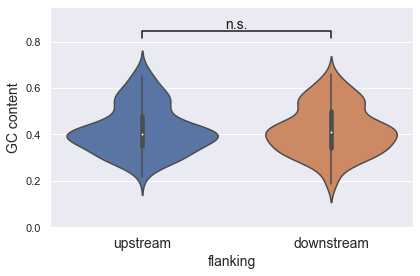

In [93]:
gcs = [up_gc, down_gc]
ax = sns.violinplot(data = gcs)
sns.set(style="darkgrid")
ax.set_ylabel('GC content',
             fontsize = 14)
ax.set_xticklabels(['upstream', 'downstream'],
                  fontsize = 14)
plt.xlabel('flanking',
          fontsize = 14)
statistical_annotation([up_gc, down_gc], significance[1], [0,1], 0.1)
ax.set_ylim(0.0, 0.95)
plt.tight_layout()
#plt.savefig('../../results/gc_contents.png', dpi = 150, quality = 95)
plt.show()

In [94]:
#define function for sampling genome based on flanking size
def flanking_based_sampling(g_id):
    global seed_value
    sequence_to_sample = numtless_sequences[g_id]
    seed_value += 1
    np.random.seed(seed_value)
    flanking_size = 400
    start = np.random.randint(0, len(sequence_to_sample) - flanking_size)
    end = start + flanking_size
    sample_sequence = sequence_to_sample[start:end]
    unknown_nucleotides = sample_sequence.count('N') / len(sample_sequence)
    if unknown_nucleotides < 0.05:
        return sample_sequence
    else:
        seed_value += 1
        start = np.random.randint(0, len(sequence_to_sample) - flanking_size)
        end = start + flanking_size
        sample_sequence = sequence_to_sample[start:end]
        return sample_sequence

In [115]:
ids.index = ids
ids

g_id
MT                        MT
1                          1
GL019308            GL019308
GL019308            GL019308
AAGW02081594    AAGW02081594
                    ...     
GL019047            GL019047
AAGW02081404    AAGW02081404
GL019311            GL019311
21                        21
GL018744            GL018744
Name: g_id, Length: 153, dtype: object

In [116]:
ids = ids.drop(labels = ids_to_drop)
ids

g_id
1                          1
GL019308            GL019308
GL019308            GL019308
AAGW02081594    AAGW02081594
AAGW02081594    AAGW02081594
                    ...     
GL018826            GL018826
GL019047            GL019047
GL019311            GL019311
21                        21
GL018744            GL018744
Name: g_id, Length: 122, dtype: object

In [119]:
#flanking based genomic samples
seed_value = 0
flage_samples = ids.apply(flanking_based_sampling)
flage_samples.apply(lambda sequence : sequence.upper())
flage_gc = flage_samples.apply(lambda sequence : (sequence.count('G') + sequence.count('C')) / len(sequence))
flage_gc

g_id
1               0.2775
GL019308        0.4125
GL019308        0.4300
AAGW02081594    0.2825
AAGW02081594    0.3225
                 ...  
GL018826        0.5600
GL019047        0.4050
GL019311        0.7525
21              0.4625
GL018744        0.5300
Name: g_id, Length: 122, dtype: float64

In [120]:
#statistics of gc content
flage_statistics = anderson(flage_gc)[0]
flage_critical_value = anderson(flage_gc)[1][2]

In [121]:
len(up_gc)

146

In [122]:
len(flage_gc)

122

In [123]:
#significance of downstream flanking gc vs genome
np.random.seed(1)
if (up_statistics > up_critical_value) or (flage_statistics > flage_critical_value):
    significance = wilcoxon(np.random.choice(up_gc, len(flage_gc)), flage_gc)
else:
    significance = ttest_ind(np.random.choice(up_gc, len(flage_gc)), flage_gc)
significance

WilcoxonResult(statistic=2679.5, pvalue=0.006162831963023501)